# Udemy Course Final Project 

## Predicting whether a mammogram mass is benign or malignant

# "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## The assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* A neural network using Keras


In [1]:
#prepering the data
import pandas as pd
df = pd.read_csv('mammographic_masses.data.txt')
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [2]:
#naming columns and transforming ? into NaN values
df = pd.read_csv('mammographic_masses.data.txt', na_values = '?')
df.columns = ['BI_RADS', 'age','shape', 'margin','density','severity']
df.head()

,BI_RADS,age,shape,margin,density,severity
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


In [3]:
#cheking the data
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,958.000000,955.000000,929.000000,912.000000,884.000000,960.000000
mean,4.347599,55.475393,2.721206,2.793860,2.910633,0.462500
std,1.783838,14.482917,1.243428,1.565702,0.380647,0.498852
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [5]:
#checking if droping rows with NaN values influences data / we can see it doesn't
masses_data = df.dropna()
masses_data.describe()

,BI_RADS,age,shape,margin,density,severity
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,4.393245,55.768396,2.781665,2.810615,2.915561,0.484922
std,1.889394,14.675456,1.243088,1.566276,0.351136,0.500074
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
#converting dataframes into numpy arrays for scikit_learn use
import numpy as np
import sklearn
features = masses_data[['age', 'shape',
                             'margin', 'density']].values

classes = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

features

array([[58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       [57.,  1.,  5.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [7]:
#normalizing data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features_scaled = scaler.fit_transform(features)
features_scaled


array([[ 0.15215552,  0.98067959,  1.39867207,  0.24061945],
       [-1.89330809, -1.43412253, -1.15669795,  0.24061945],
       [ 0.0839734 , -1.43412253,  1.39867207,  0.24061945],
       ...,
       [ 0.56124824,  0.98067959,  1.39867207,  0.24061945],
       [ 0.69761248,  0.98067959,  1.39867207,  0.24061945],
       [ 0.424884  ,  0.17574555,  0.12098706,  0.24061945]])

## Decision Trees


In [8]:
#train/test split 
from sklearn import tree
from sklearn.model_selection import train_test_split 
np.random.seed(1234)
(x_training, x_test, y_training, y_test) = train_test_split(features_scaled, classes, test_size = 0.25, random_state = 1)

In [9]:
#creating a Decision Tree Classifier and fitting it to training data 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(x_training, y_training)

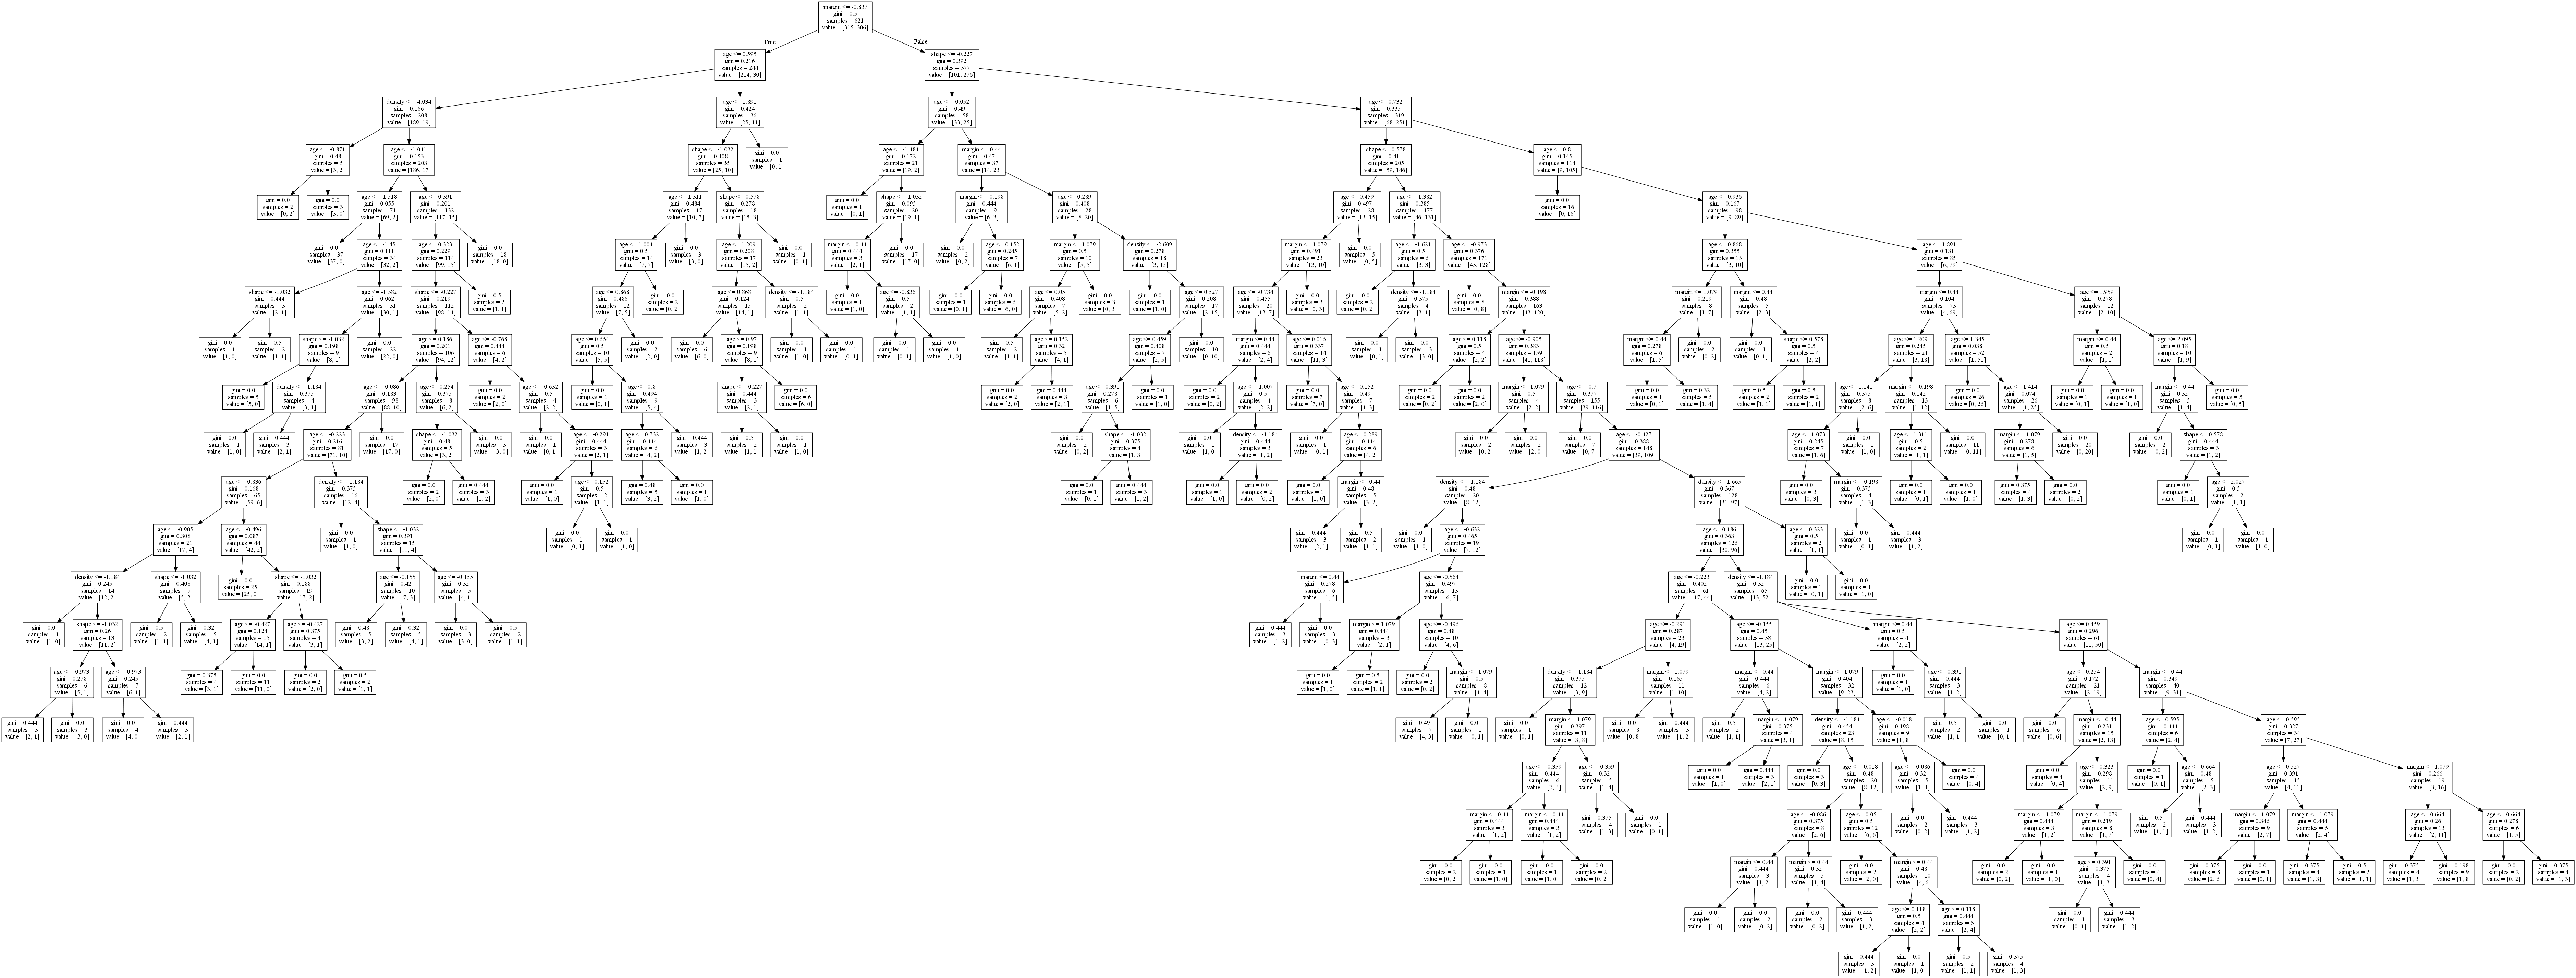

In [12]:
#visualising the tree
import six 
from IPython.display import Image  
from six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
#measuring accuracy 
print(clf.score(x_training, y_training))
print(clf.score(x_test, y_test))

0.9146537842190016
0.7548076923076923


Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [28]:
#measruing accuracy with k-fold cross validation 
from sklearn.model_selection import cross_val_score

kfold = cross_val_score(clf, features_scaled, classes, cv=10)
kfold.mean()

0.7418013517484573

In [34]:
#Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
kfold= cross_val_score(clf, features_scaled, classes, cv=10)

kfold.mean()

0.7586394357919483

## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [36]:
#svm with linear kernel 
from sklearn import svm

svc = svm.SVC(C = 1.0, kernel = 'linear')

In [37]:
#measuring accuracy 
kfold = cross_val_score(svc, features_scaled, classes, cv=10)
kfold.mean()


0.7972818101674994

In [42]:
#k-nearest neighbours classifier
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 10)

kfold = cross_val_score(knn, features_scaled, classes, cv = 10)
kfold.mean()

0.7912136350279165

In [45]:
#creating a loop to check the influence of K value 
for x in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = x)
    kfold = cross_val_score(knn, features_scaled, classes, cv = 10)
    print(x, kfold.mean())

1 0.717660887452248
2 0.6995739053776081
3 0.7574199235968263
4 0.7344989714957391
5 0.7767411107846017
6 0.7731266529532765
7 0.7936526594181605
8 0.7791507493388188
9 0.7900235086688217
10 0.7912136350279165
11 0.7972818101674992
12 0.7840287981193066
13 0.784014105201293
14 0.7779753158977373
15 0.7791801351748457
16 0.7743755509844255
17 0.7767851895386423
18 0.7731707317073171
19 0.7876432559506317
20 0.7840141052012929
21 0.7864531295915369
22 0.7804143402879812
23 0.7804143402879812
24 0.7792095210108728
25 0.7852776961504555
26 0.7852483103144284
27 0.7828533646782251
28 0.7864531295915369
29 0.7852483103144284
30 0.7900675874228622
31 0.7876579488686454
32 0.7876579488686453
33 0.7864678225095504
34 0.785263003232442
35 0.785263003232442
36 0.7888627681457537
37 0.7888921539817807
38 0.7864678225095505
39 0.785263003232442
40 0.785263003232442
41 0.7816485454011166
42 0.7828533646782251
43 0.7816485454011166
44 0.7816485454011166
45 0.7828533646782251
46 0.7840581839553336
47 

In [46]:
#Naive bayes 
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features)

nb = MultinomialNB()
kfold = cross_val_score(nb, features_minmax, classes, cv=10)

kfold.mean()

0.7851895386423743

In [ ]:
#checking svm with different kernels

In [47]:
svc = svm.SVC(C = 1.0, kernel = 'rbf') 

kfold = cross_val_score(svc, features_scaled, classes, cv=10)
kfold.mean()

0.8033352923890685

In [48]:
svc = svm.SVC(C = 1.0, kernel = 'sigmoid') 

kfold = cross_val_score(svc, features_scaled, classes, cv=10)
kfold.mean()

0.7395092565383485

In [49]:
svc = svm.SVC(C = 1.0, kernel = 'poly') 

kfold = cross_val_score(svc, features_scaled, classes, cv=10)
kfold.mean()

0.7912577137819572

In [50]:
#logistic regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)

kfold = cross_val_score(lr, features_scaled, classes, cv=10)
kfold.mean()

0.8069791360564208

In [ ]:
#creating a neural network model 

In [53]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


In [58]:
def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=4, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  
    return model

In [62]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
estimator = KerasClassifier(build_fn = create_model, epochs = 100, verbose = 0)

kfold = cross_val_score(estimator, features_scaled, classes, cv=10)
kfold.mean()

0.7912577092647552

In [ ]:
# svc.svm with a kernel "rbf" has the best result, but all besides decision tree are close to 80%